## 1. Agenda

- `Convolutions without training`

- `Convert with MNIST`

- `tf.layers`

## 2. Understanding convolutions

**Convolutions in math and physics**

a function derived from two given functions by integration that expresses how the shape of one is modified by the other.

How an input is transformed by a kernel(filter/feature map)

**Convolutions in machine learning**

We can use one single convolutional layer to modify a certain image

Matrix multiplication of this kernel with a 3x3 patch of an image is a weighted sum of neighboring pixels

In [1]:
# Kernelr for blurring
blur = [[0.0625, 0.125, 0.0625],
       [0.125, 0.25, 0.125],
       [0.0625, 0.125, 0.0625]]


## 3. Convolutions in Tensorflow

We can use one single convolutional layer to midify a certain image

- `tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=True, data_format='NHWC', dilations=[1,1,1,1], name=None`

input = Batch size(N) x Height (H) x Width(W) x Channels(C)

filter = Height x Width x Input Channels x Output Channels

stides = 4 element 1-D tensor, strides in each direction

padding = 'SAME' or 'VALID'

In [2]:
import numpy as np
import tensorflow as tf


In [3]:
a = np.zeros([3,3,3,3])
print(a)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [4]:
a[1,1,:,:] = 0.25
a[0,1,:,:] = 0.125
a[1,0,:,:] = 0.125
a[2,1,:,:] = 0.125
a[1,2,:,:] = 0.125
a[0,0,:,:] = 0.0625
a[0,2,:,:] = 0.0625
a[2,0,:,:] = 0.0625
a[2,2,:,:] = 0.0625

In [5]:
print(a)

[[[[0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]]

  [[0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]]

  [[0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]]]


 [[[0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]]

  [[0.25   0.25   0.25  ]
   [0.25   0.25   0.25  ]
   [0.25   0.25   0.25  ]]

  [[0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]]]


 [[[0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]]

  [[0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]
   [0.125  0.125  0.125 ]]

  [[0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]
   [0.0625 0.0625 0.0625]]]]


In [6]:
BLUR_FILTER_RGB = tf.constant(a, dtype=tf.float32)

In [7]:
a = np.zeros([3,3,1,1])
a[1,1,:,:] = 1.0
a[0, 1, :, :] = 1.0
a[1, 0, :, :] = 1.0
a[2, 1, :, :] = 1.0
a[1, 2, :, :] = 1.0
a[0, 0, :, :] = 1.0
a[0, 2, :, :] = 1.0
a[2, 0, :, :] = 1.0
a[2, 2, :, :] = 1.0
print(a)

[[[[1.]]

  [[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]

  [[1.]]]]


In [8]:
BLUR_FILTER = tf.constant(a, dtype=tf.float32)

In [9]:
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1

SHARPEN_FILTER_RGB = tf.constant(a, dtype=tf.float32)

In [10]:
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1

SHARPEN_FILTER = tf.constant(a, dtype=tf.float32)

In [11]:
EDGE_FILTER_RGB = tf.constant([
			[[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]],
            [[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ 8., 0., 0.], [ 0., 8., 0.], [ 0., 0., 8.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]],
			[[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]]
])

In [12]:
a = np.zeros([3, 3, 1, 1])
# a[:, :, :, :] = -1
# a[1, 1, :, :] = 8
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[1, 2, :, :] = -1
a[2, 1, :, :] = -1
a[1, 1, :, :] = 4

EDGE_FILTER = tf.constant(a, dtype=tf.float32)

In [13]:
a = np.zeros([3, 3, 3, 3])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2 # originally 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2

TOP_SOBEL_RGB = tf.constant(a, dtype=tf.float32)

In [14]:
a = np.zeros([3, 3, 1, 1])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2 # originally 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2

TOP_SOBEL = tf.constant(a, dtype=tf.float32)

In [15]:
a = np.zeros([3, 3, 3, 3])
a[0, 0, :, :] = -2
a[0, 1, :, :] = -1 
a[1, 0, :, :] = -1
a[1, 1, :, :] = 1
a[1, 2, :, :] = 1
a[2, 1, :, :] = 1
a[2, 2, :, :] = 2

EMBOSS_FILTER_RGB = tf.constant(a, dtype=tf.float32)

In [16]:
a = np.zeros([3, 3, 1, 1])
a[0, 0, :, :] = -2
a[0, 1, :, :] = -1 
a[1, 0, :, :] = -1
a[1, 1, :, :] = 1
a[1, 2, :, :] = 1
a[2, 1, :, :] = 1
a[2, 2, :, :] = 2
EMBOSS_FILTER = tf.constant(a, dtype=tf.float32)

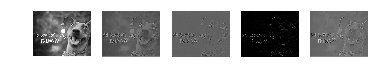

In [18]:
from matplotlib import gridspec as gridspec
from matplotlib import pyplot as plt

def read_one_image(filename):
    ''' This method is to show how to read image from a file into a tensor.
    The output is a tensor object.
    '''
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_image(image_string)
    image = tf.cast(image_decoded, tf.float32) / 256.0
    return image

def convolve(image, kernels, rgb=True, strides=[1, 3, 3, 1], padding='SAME'):
    images = [image[0]]
    for i, kernel in enumerate(kernels):
        filtered_image = tf.nn.conv2d(image, 
                                      kernel, 
                                      strides=strides,
                                      padding=padding)[0]
        if i == 2:
            filtered_image = tf.minimum(tf.nn.relu(filtered_image), 255)
        images.append(filtered_image)
    return images

def show_images(images, rgb=True):
    gs = gridspec.GridSpec(1, len(images))
    for i, image in enumerate(images):
        plt.subplot(gs[0, i])
        if rgb:
            plt.imshow(image)
        else: 
            image = image.reshape(image.shape[0], image.shape[1])
            plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

def main():
    rgb = False
    if rgb:
        kernels_list = [BLUR_FILTER_RGB, 
                        SHARPEN_FILTER_RGB, 
                        EDGE_FILTER_RGB,
                        TOP_SOBEL_RGB,
                        EMBOSS_FILTER_RGB]
    else:
        kernels_list = [BLUR_FILTER,
                        SHARPEN_FILTER,
                        EDGE_FILTER,
                        TOP_SOBEL,
                        EMBOSS_FILTER]

    kernels_list = kernels_list[1:]
    image = read_one_image('data/friday.jpg')
    if not rgb:
        image = tf.image.rgb_to_grayscale(image)
    image = tf.expand_dims(image, 0) # make it into a batch of 1 element
    images = convolve(image, kernels_list, rgb)
    with tf.Session() as sess:
        images = sess.run(images) # convert images from tensors to float values
    show_images(images, rgb)

if __name__ == '__main__':
    main()

## 4. ConvNet with MNIST

### padding

Input width=13, Filter width = 6, Stride = 5

VALID = without padding ,  only ever drops the right-most columns(or bottom-most rows)

input : {1 2 3 4 5 {6} 7 8 9 10 11}(12 13)


SAME = with zero padding, tries to pad evenly left and right, but if the amount of columns to be added is odd, it will add the extra column to the right.

input {0 1 2 3 4 {5} 6 7 8 9 {10} 11 12 13 0 0}

In [1]:
import time
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import utils

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
N_CLASSES = 10

# Step1 : Read in data
# using TF learn's built in function to laoad MNIST
mnist = input_data.read_data_sets("/data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data/mnist\t10k-images-idx3-ubyte.gz
Extracting /data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Step2 : Define parameters for the model
LEARNING_RATE = 0.001
BATCH_SIZE = 128
SKIP_STEP = 10
DROPOUT = 0.75
N_EPOCHS = 1

In [4]:
# Step3 : create placeholders for features and labels
# each image in the MNIS datga is of shape 28*28 = 784
# therefore each image is represented with a 1x784 tensor
# We'll be doing dropout for hidden layer so we'll need a placeholder
# for the dropout probability too
# Use None for shape so we can change the batch_size once we've built the graph
with tf.name_scope('data'):
    X = tf.placeholder(tf.float32, [None, 784], name='X_placeholder')
    Y = tf.placeholder(tf.float32, [None, 10], name='Y_placeholder')
    
dropout = tf.placeholder(tf.float32, name='dropout')

In [5]:
# Step 4+5 :create weights + do inference
# the model is conv -> relu -> pool -> conv -> relu -> pool -> fully connected -> softmax

global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

with tf.variable_scope('conv1') as scope:
    # first, reshpae the image to [BATCH_SIZE, 28, 28, 1] to make it work with  tf.nn.conv2d
    images = tf.reshape(X, shape=[-1, 28, 28, 1])
    kernel = tf.get_variable('kernel', [5,5,1,32], initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [32], initializer=tf.random_normal_initializer())
    conv = tf.nn.conv2d(images, kernel, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv + biases, name=scope.name)
    
    # output is of dimension BATCH_SIZE x 28 x 28 x 32
    # conv1 = tf.contrib.layers.conv2d(images, 32, 5, 1, activation_fn=tf.nn.relu, padding='SAME')
    
with tf.variable_scope('pool1') as scope:
    pool1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
with tf.variable_scope('conv2') as scope:
    kernel = tf.get_variable('kernels', [5,5,32,64], initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [64], initializer=tf.random_normal_initializer())
    conv = tf.nn.conv2d(pool1, kernel, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv+biases, name=scope.name)
    
with tf.variable_scope('pool2') as scope:
    pool2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
with tf.variable_scope('fc') as scope:
    input_features = 7*7*64
    w = tf.get_variable('weights', [input_features, 1024], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('biases', [1024], initializer=tf.constant_initializer(0.0))
    
    pool2 = tf.reshape(pool2, [-1, input_features])
    fc = tf.nn.relu(tf.matmul(pool2, w) + b, name='relu')
    
    # pool2 = layers.flatten(pool2)
    # fc = layers.fully_connected(pool2, 1024, tf.nn.relu)
    
    fc = tf.nn.dropout(fc, dropout, name='relu_dropout')
    
with tf.variable_scope('softmax_linear') as scope:
    w = tf.get_variable('weights', [1024, N_CLASSES], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('biases', [N_CLASSES], initializer=tf.random_normal_initializer())
    logits = tf.matmul(fc, w) + b

In [6]:
# Step 6: define loss function
# use softmax cross entropy with logits as the loss function
# compute mean cross entropy, softmax is applied internally
with tf.name_scope('loss'):
    entropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits)
    loss = tf.reduce_mean(entropy, name='loss')
    
with tf.name_scope('summaries'):
    tf.summary.scalar('loss', loss)
    tf.summary.histogram('histogram loss', loss)
    summary_op =  tf.summary.merge_all()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

INFO:tensorflow:Summary name histogram loss is illegal; using histogram_loss instead.


In [7]:
# Step 7: define trainig op
# using gradient descent with learning rate of LEARNING RATE to minimize cost
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss, global_step=global_step)

utils.make_dir('checkpoints')
utils.make_dir('checkpoints/convnet_mnist')

In [9]:
import os 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    
    writer = tf.summary.FileWriter('./graphs/convnet', sess.graph)
    ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpints/convnet_mnist/checkpoint'))
    # if that checkpoint exists, restore from checkpoint
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess, ckpt.model_checkpoint_path)
        
    initial_step = global_step.eval()
    
    start_time = time.time()
    n_batches = int(mnist.train.num_examples / BATCH_SIZE)
    
    total_loss = 0.0
    for index in range(initial_step, n_batches*N_EPOCHS):
        X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
        _, loss_batch, summary = sess.run([optimizer, loss, summary_op], feed_dict={X:X_batch, Y:Y_batch, dropout:DROPOUT})
        
        writer.add_summary(summary, global_step=index)
        total_loss += loss_batch
        
        if(index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index+1, total_loss/SKIP_STEP))
            total_loss = 0.0
            saver.save(sess, 'checkpoints/convnet_mnist/mnist-convnet', index)
            
    print("Optimization Finished")
    print("Total time:{0} seconds".format(time.time() - start_time))
    
    # test the model
    n_batches = int(mnist.test.num_examples/BATCH_SIZE)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(BATCH_SIZE)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X:X_batch, Y:Y_batch, dropout:1.0})
        preds = tf.nn.softmax(logits_batch)
        correct_pres = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_pres, tf.float32))
        total_correct_preds += sess.run(accuracy)
        
    print("Accuracy {0}".format(total_correct_preds/mnist.test.num_examples))

Average loss at step 10: 24726.8
Average loss at step 20: 14294.9
Average loss at step 30: 8917.2
Average loss at step 40: 6323.6
Average loss at step 50: 4861.0
Average loss at step 60: 3766.8
Average loss at step 70: 3294.9
Average loss at step 80: 2475.9
Average loss at step 90: 2361.7
Average loss at step 100: 2229.0
Average loss at step 110: 2042.0
Average loss at step 120: 2073.5
Average loss at step 130: 1653.0
Average loss at step 140: 1721.7
Average loss at step 150: 1456.4
Average loss at step 160: 1288.7
Average loss at step 170: 1233.6
Average loss at step 180: 1094.8
Average loss at step 190: 1305.5
Average loss at step 200: 1067.7
Average loss at step 210: 952.4
Average loss at step 220: 1023.8
Average loss at step 230: 1035.4
Average loss at step 240: 1176.2
Average loss at step 250: 967.6
Average loss at step 260: 773.6
Average loss at step 270: 953.9
Average loss at step 280: 928.8
Average loss at step 290: 810.8
Average loss at step 300: 764.9
Average loss at step 310

In [ ]:
import os
import time

import tensorflow as tf
import utils

def 

## 5. tf.layers

- `conv1 = tf.layers.conv2d(inputs=self.img, filter=32, kernel_size=[5,5],padding='SAME', activation=tf.nn.relu, name='conv1'`


- `pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2, name='pool1'`


- `tf = tf.layers.dense(pool2, 1024, activation=tf.nn.relu, name='fc')`

**dropout**

Drop neurals during training, want to use all of them during testing
- `self.training = tf.placeholder(tf.bool)`
- `dropout = tf.layers.dropout(fc, self.keep_prob, training=self.training, name='dropout')`